<a href="https://colab.research.google.com/github/Roumyajit/Data-Science/blob/main/Netflix_Viewing_Analytics_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preview:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September

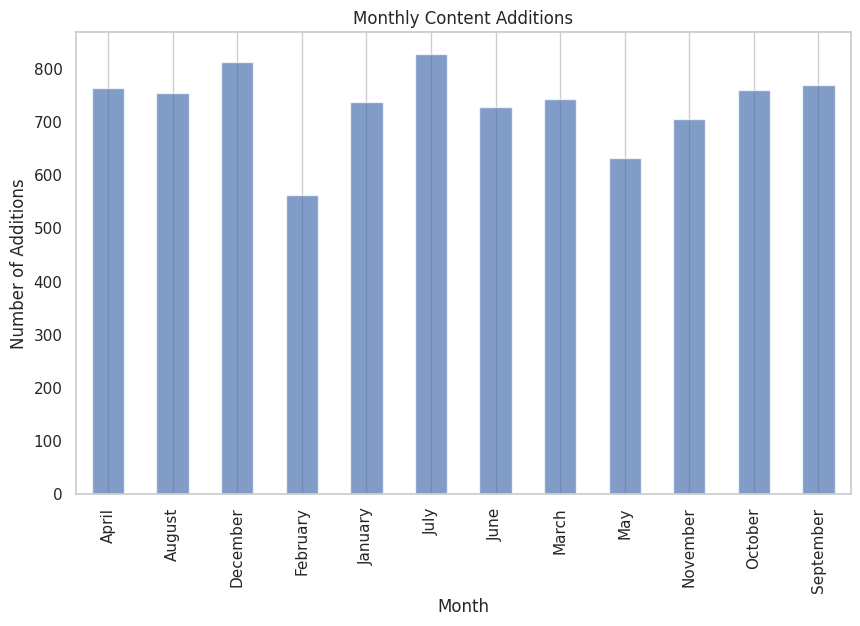

<ipython-input-16-a4aa46043103>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], palette="Set2")


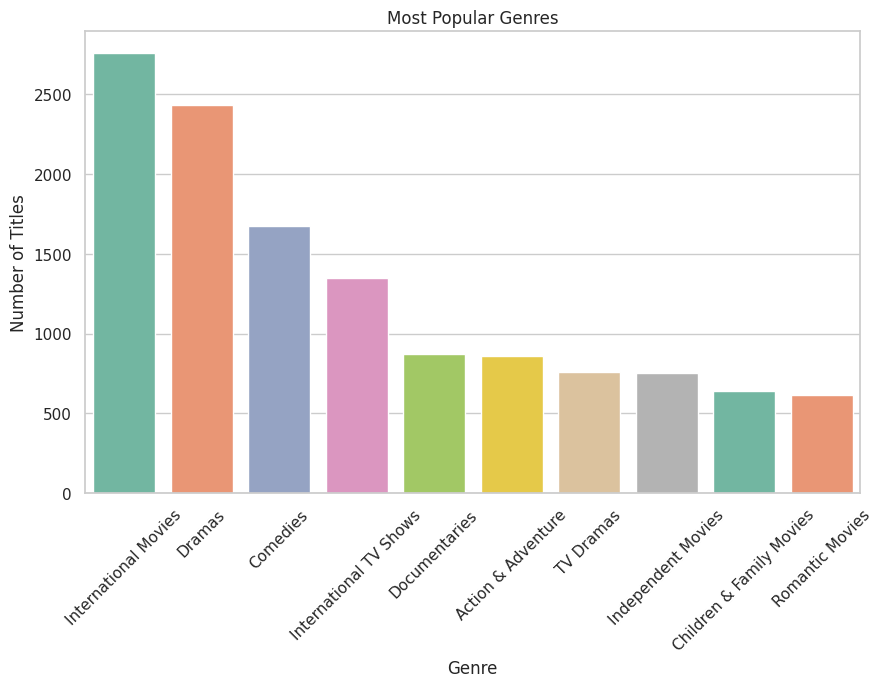

<ipython-input-16-a4aa46043103>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_views.index, y=country_views.values, palette="coolwarm")


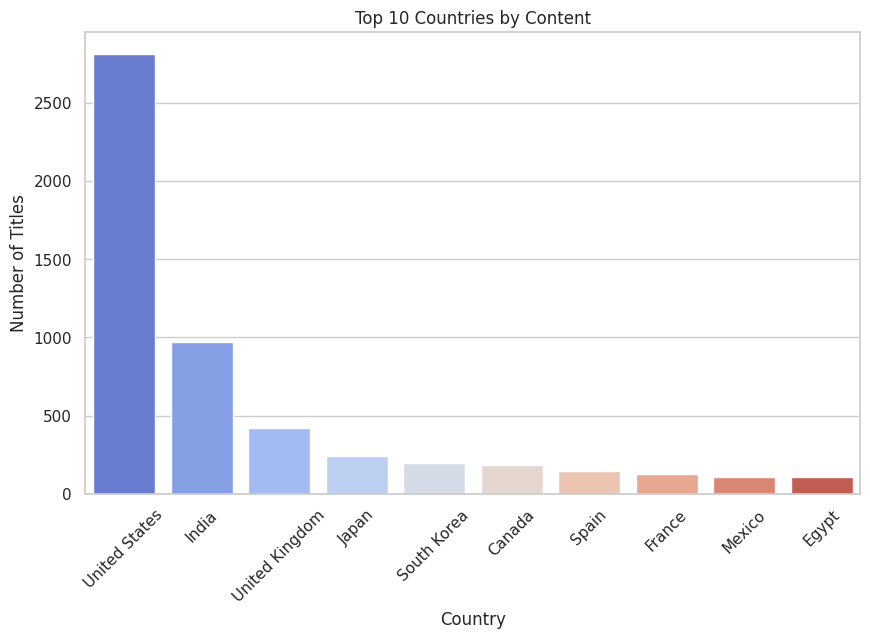


--- Insights ---
Month with the most additions: July with 827 additions
Most popular genre: International Movies with 2752 titles
Top 3 countries by content:
 country
United States     2812
India              972
United Kingdom     418
Name: count, dtype: int64


In [16]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset -

# Replace 'netflix_dataset.csv' with your dataset file path
data = pd.read_csv('/content/netflix.csv')

# Preview the dataset
print("Dataset Preview:")
print(data.head())

# Data Cleaning -

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Drop rows with missing values in 'date_added'
data.dropna(subset=['date_added'], inplace=True)

# Strip leading and trailing spaces in the 'date_added' column
data['date_added'] = data['date_added'].str.strip()

# Convert 'date_added' column to datetime format
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Check for rows where conversion failed
failed_conversion = data[data['date_added'].isna()]
if not failed_conversion.empty:
    print("\nRows with invalid 'date_added' values:")
    print(failed_conversion)

# Drop rows where 'date_added' could not be parsed
data.dropna(subset=['date_added'], inplace=True)

# Feature Engineering -

# Extract 'Hour', 'Day of Week', and 'Month' from the 'date_added' column
data['DayOfWeek'] = data['date_added'].dt.day_name()
data['Month'] = data['date_added'].dt.month_name()

# Analysis and Visualization -

# Peak Viewing Times
monthly_additions = data['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
monthly_additions.plot(kind='bar', color='b', alpha=0.7)
plt.title("Monthly Content Additions")
plt.xlabel("Month")
plt.ylabel("Number of Additions")
plt.grid(axis='y')
plt.show()

# Popular Genres
data_genres = data['listed_in'].str.split(', ', expand=True).stack().reset_index(drop=True)
genre_counts = data_genres.value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], palette="Set2")
plt.title("Most Popular Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

# Geographic Trends
country_views = data['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_views.index, y=country_views.values, palette="coolwarm")
plt.title("Top 10 Countries by Content")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

# Insights
print("\n--- Insights ---")
print(f"Month with the most additions: {monthly_additions.idxmax()} with {monthly_additions.max()} additions")
print(f"Most popular genre: {genre_counts.idxmax()} with {genre_counts.max()} titles")
print("Top 3 countries by content:\n", country_views.head(3))
